In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [97]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [98]:
tf.test.is_built_with_cuda()

True

In [99]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [100]:
x_train.shape

(50000, 32, 32, 3)

In [101]:
x_train[49999][31][30]                        


array([164, 164, 162], dtype=uint8)

In [102]:
y_train.shape

(50000, 1)

In [103]:
y_train[0:9]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8]], dtype=uint8)

In [104]:
classfication = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train[7][0]

7

In [105]:
x_train[7]

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]

In [106]:
def plt_sample(index):
    plot.figure(figsize=(10,1))
    plot.imshow(x_train[index])

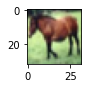

In [107]:
plt_sample(7)

In [108]:
# Scale the X train and test by dividing 256
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [109]:
x_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [110]:
#x_test_scaled

In [111]:
# Use one hot encoding to substitute single dimension with 10 column representation 
# for use with categorical_crossentropy.

print(y_train)
y_train_categorical = keras.utils.to_categorical(y_train, num_classes= 10, dtype= 'float32')
print(y_train_categorical)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [112]:
print(y_test)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes= 10, dtype= float)
print(y_test_categorical)


[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [113]:
def get_Model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(3072,activation = 'relu'),
    keras.layers.Dense(1024,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
    ]
    )
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

In [114]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_Model()
    cpu_model.fit(x_train_scaled, y_train_categorical,epochs=1)

1563/1563 [==============================] - 105s 67ms/step - loss: 1.9306 - accuracy: 0.3087
1min 45s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [116]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_Model()
    gpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 4s 3ms/step - loss: 1.9287 - accuracy: 0.3055
5.38 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [123]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_Model()
    gpu_model.fit(x_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9388 - accuracy: 0.3021
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6521 - accuracy: 0.4167
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5563 - accuracy: 0.4535
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4960 - accuracy: 0.4733
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4320 - accuracy: 0.4971
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3958 - accuracy: 0.5062
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3554 - accuracy: 0.5261
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3129 - accuracy: 0.5390
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2791 - accuracy: 0.5536
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.243

In [120]:
classfication[y_test[0][0]]

'cat'